# Sample use of the sun topic model 

In [1]:
import numpy as np
from suntm import SunTopic
import matplotlib.pyplot as plt
# import statsmodels.api as sm

In [2]:
import numpy as np
from suntm import SunTopic
import matplotlib.pyplot as plt
# import statsmodels.api as sm
# Generate random data as the 'embeddings' for the 'documents' in the corpus
np.random.seed(2024)
n = 2000
m = 100
J = 10
W_t = np.random.rand(n, J)
H_t = np.random.rand(J, m)
X = np.dot(W_t, H_t) + np.random.rand(n, m) * 0.05
coef_true = np.random.normal(0, 1, J)
Y = np.dot(W_t, coef_true) + np.random.rand(n) * 0.05
Y = (Y - np.mean(Y)) / np.std(Y)

In [3]:
# Split the data into a training and an estimation set
X_train = X[:1500, :]
X_est = X[1500:, :]
Y_train = Y[:1500]
Y_est = Y[1500:]

# Initialize and fit the model for random hyperparameter choices
model = SunTopic(Y=Y_train, X=X_train, alpha=0.5, num_bases=3, random_state=2024)
model.fit()
model.summary()


            SunTopic Model Summary
            Number of topics: 3
            Alpha: 0.5
            Data shape: (1500, 101)
            Number of iterations of model fit: 100
            Random initialization state: 2024
            Frobenius norm error: 71.06660610331244
            In-sample MSE: 0.6725848829359895
            Prediction coefficients: [-0.24148938  0.2146859   0.017745  ]
            


In [4]:
get_ipython().__class__.__name__

'ZMQInteractiveShell'

In [5]:
# Use cross validation for finding optimal hyperparameters: number of bases and alpha
model.hyperparam_cv(
    alpha_range=np.linspace(0.1, 0.9, 9),
    num_bases_range=np.arange(2, 11),
    cv_folds=5,
    random_state=2024,
)
model.cv_summary()

Cross-Validation Progress:   0%|          | 0/405 [00:00<?, ?it/s]

Failure:interrupted


SolverError: Solver 'SCS' failed. Try another solver, or solve with verbose=True for more information.

In [6]:
# Use parallelization to speed up the hyperparameter search
model.hyperparam_cv(
    alpha_range=np.linspace(0.1, 0.9, 9),
    num_bases_range=np.arange(2, 11),
    cv_folds=5,
    random_state=2024,
    parallel=True,
)
model.cv_summary()

Cross-Validation Progress:   0%|          | 0/405 [00:00<?, ?it/s]

/Users/tillrs/micromamba/envs/sun_topicmodel/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



            Cross-Validation Summary
            Alpha candidate values: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
            Number of topics: [ 2  3  4  5  6  7  8  9 10]
            Number of folds: 5
            CV Random state: 2024
            
Top 1 hyperparam combinations - num_bases: 3.00,alpha: 0.10, MSE: 0.3989
Top 2 hyperparam combinations - num_bases: 2.00,alpha: 0.10, MSE: 0.4389
Top 3 hyperparam combinations - num_bases: 4.00,alpha: 0.20, MSE: 0.4925


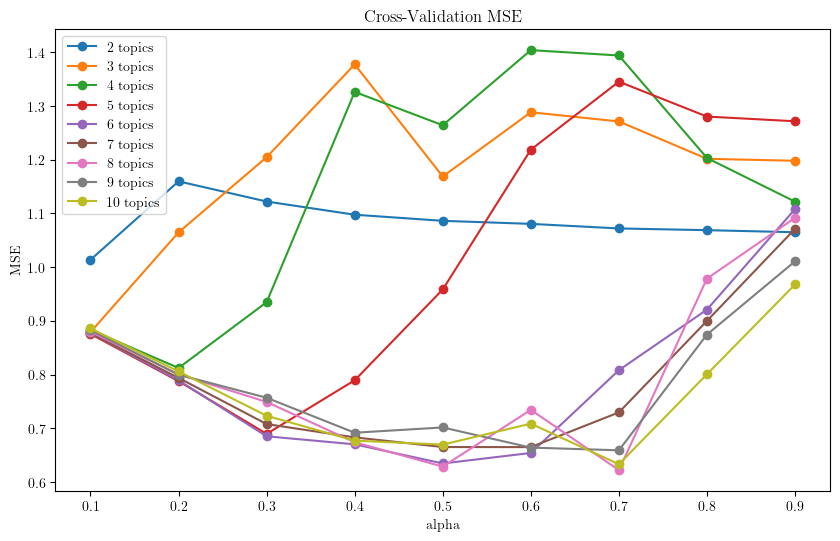

In [17]:
# Use in-built plotting functions to visualize the results
model.cv_mse_plot()

# Estimate Average Marginal Component Effect (AMCE) of Topics

In [18]:
# Initialize and fit the model with best hyperparameters
model = SunTopic(Y=Y_train, X=X_train, alpha=0.7, num_bases=8, random_state=2024)
model.fit()
model.summary()

Suntopic Model Summary
Number of topics:  8
Alpha:  0.7
Data shape:  (1500, 101)
Number of iterations of model fit:  100
Random initialization state:  2024
Frobenius norm error:  72.99344906478201
In-sample MSE:  0.4979011859708126
Prediction coefficients:  [-0.25067707  0.15516305 -0.10464602 -0.728741    2.2674413  -0.51949737
  0.17639362 -0.62181061]


In [19]:
# Save and load the model
model.save("model")
model_loaded = SunTopic.load("model.npz")

In [22]:
Y_est_pred, W_est = model_loaded.predict(X_est, return_topics=True, random_state=2025)
print(f"{W_est.shape = }")

# Fit a linear regression model to the estimated topics
W_est = sm.add_constant(W_est)
model_est = sm.OLS(Y_est, W_est).fit()
model_est.summary()

W_est.shape = (500, 8)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     71.00
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           4.42e-77
Time:                        19:30:56   Log-Likelihood:                -544.65
No. Observations:                 500   AIC:                             1107.
Df Residuals:                     491   BIC:                             1145.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3136      0.317     10.448      0.000       2.690       3.937
x1            -1.9681      0.127    -15.501      0.000      -2.218      -1.719
x2            -0.8410      0.147     -5.736      0.000      -1.129      -0.553
x3            -1.2854      0.075    -17.173      0.000      -1.432      -1.138
x4            -3.2143      0.246    -13.091      0.000      -3.697      -2.732
x5             3.7756      0.294     12.837      0.000       3.198       4.353
x6            -3.2700      0.340     -9.609      0.000      -3.939      -2.601
x7            -0.8825      0.163     -5.411      0.000      -1.203      -0.562
x8            -1.9814      0.178    -11.147      0.000      -2.331      -1.632
==============================================================================
Omnibus:                        6.151   Durbin-Watson:                   2.215
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.419
Skew:                          -0.091   Prob(JB):                        0.110
Kurtosis:                       2.577   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

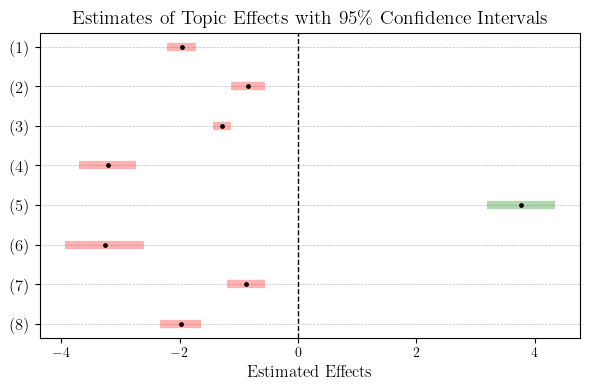

In [21]:
# Set font to Computer Modern
plt.rcParams["text.usetex"] = True

# Extract parameters and confidence intervals from the regression results
params = model_est.params[1:]
conf_int = model_est.conf_int()[1:]

# Plot the parameters
fig, ax = plt.subplots(figsize=(6, 4))

for i, (param, (lower, upper)) in enumerate(zip(params, conf_int)):
    # Add horizontal lines between rows
    ax.axhline(i, color="gray", linestyle="--", linewidth=0.5, alpha=0.5)

    if lower <= 0 & 0 <= upper:
        ax.plot(
            [lower, upper],
            [i, i],
            color="lightgray",
            linewidth=6,
            solid_capstyle="butt",
            alpha=0.7,
        )
        ax.scatter(param, i, marker="o", s=6, color="black", zorder=10)

    elif lower <= 0 & 0 >= upper:
        ax.plot(
            [lower, upper],
            [i, i],
            color="red",
            linewidth=6,
            solid_capstyle="butt",
            alpha=0.3,
        )
        ax.scatter(param, i, marker="o", s=6, color="black", zorder=10)

    else:
        ax.plot(
            [lower, upper],
            [i, i],
            color="green",
            linewidth=6,
            solid_capstyle="butt",
            alpha=0.3,
        )
        ax.scatter(param, i, marker="o", s=6, color="black", zorder=10)

# Customize the plot
ax.axvline(0, color="black", linestyle="--", linewidth=1)  # Add a vertical line at x=0
ax.yaxis.tick_left()
ax.invert_yaxis()  # Flip the graph
ax.set_yticks(np.arange(len(params)))
ax.set_yticklabels([f"({i+1})" for i in range(len(model_est.params) - 1)], fontsize=12)
ax.set_xlabel("Estimated Effects", fontsize=12)
# include lin break in the title
ax.set_title("Estimates of Topic Effects with 95\% Confidence Intervals", fontsize=14)


# Save or show the plot
plt.tight_layout()

plt.show()